<div style="text-align:center"> <h1>Demographic filtering ( Simple approach )</h1> </div>


<b> The system will recommend the most popular movies to a user based on their demographics. </b>

<i>The idea here is to offer the recommendation using the popularity of a movie and the user's demographics.
As User's withing the same demographics are more likely to prefer similar popular content. </i>

<br>
<br>


<div style="text-align:center">
 <img src="https://c.tenor.com/2RvCDQj3nVQAAAAC/its-trending-latest.gif" width = 200 />
</div>
<div style="text-align:center">
     <small><a href='https://tenor.com/view/its-trending-latest-popular-hilary-duff-kelsey-peters-gif-14424633'>© tenor</a></small>  
</div>

<br>
This approach does not give any personalized recommendation, it is more of a generalized
approach. 

    e.g. The Stranger Things is likely to be popular series among the age group 18-25,
    or 13 reasons Why could be more popular among college students, mainly from the US. 
    

just like that based on the similarity among users, we can offer a basic recommendation
system. 
NOTE - As each person is different, this could be a naive(or simple) approach.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_movies = pd.read_csv('../DATA/tmdb_5000_movies.csv')

In [23]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
df_credits = pd.read_csv('../DATA/tmdb_5000_credits.csv')

In [25]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
df_movies = df_movies.merge(df_credits,left_on="id",right_on="movie_id")

In [27]:
df_movies =  df_movies.drop(["title_y","movie_id"],axis=1)

In [28]:
df_movies = df_movies.rename(columns={
    "title_x" : "title"
})

#### Movie Score

We've to define the metric to rate the movies fairly. 
We can not use the average rating for the movie.

e.g. let's say movie A has an average rating of 8.9, and movie B has 7.8, But A has 
only 3 vote counts which means only 3 users think that is it a great movie, whereas
movie B has a 1000 vote count, which indicates that even though B has a 7.8 rating it is more 
popular than A, 

So, We'll use IMDB's weighted rating (wr) : 

   <img src ="../DATA/weighted_score.png" >

Where, 

    v - Number of votes for the movie 
    m - Minimum threshold votes to be listed in the chart
    R - Average rating of the movie
    C - Mean vote across the all the movies
    
We already have v(vote_count) and R (vote_average) and C can be calculated as :

In [29]:
mean_vote_C =  np.round(df_movies["vote_average"].mean(),2)

Now let's determine an appropriate value for the m

    m = Minimum votes required to be listed in the chart. 
For that, we can
select only the top 10% of movies aka 90 percentile as a cutoff. 

In [30]:
minimum_votes_M = df_movies['vote_count'].quantile(0.9)

In [31]:
top_movies = df_movies.copy()[df_movies["vote_count"] > minimum_votes_M]

In [32]:
top_movies.shape

(481, 22)

In [33]:
def weighted_score(movie,m=minimum_votes_M,C=mean_vote_C):
    num_of_vote_V = movie["vote_count"]
    vote_average_R = movie["vote_average"]
    
    # devide equation for easy read
    
    x = (num_of_vote_V / (num_of_vote_V + minimum_votes_M))* vote_average_R
    y = (minimum_votes_M / (num_of_vote_V + minimum_votes_M))* mean_vote_C
    
    return x + y

In [34]:
score =  top_movies.apply(weighted_score,axis=1)

In [35]:
top_movies['score'] = top_movies.copy().apply(weighted_score,axis=1)

In [36]:
top_movies = top_movies.sort_values('score', ascending=False)

In [37]:
top_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.058860
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.938901
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.919732
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904256
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.862983


Now we have the movies by their scores, to suggest the top trending movies
as the last piece of the puzzle, we will sort our data frame by popularity. 

##### Top Trending movies

In [38]:
df_trending = top_movies.sort_values('popularity',ascending=False)

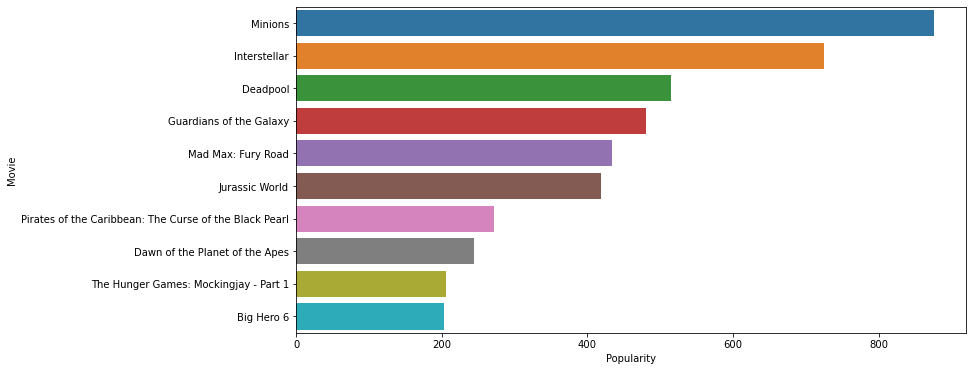

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_trending.head(10),x='popularity',y="title")
plt.xlabel("Popularity");
plt.ylabel("Movie");

In [41]:
# Thank you!